In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<h1>Reading File</h1>

In [2]:
dataframe = pd.read_csv('IMDB Top 250 Movies.csv')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [4]:
dataframe.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


<h1>Null Value in Dataframe  </h1>

In [5]:
dataframe.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

<AxesSubplot: >

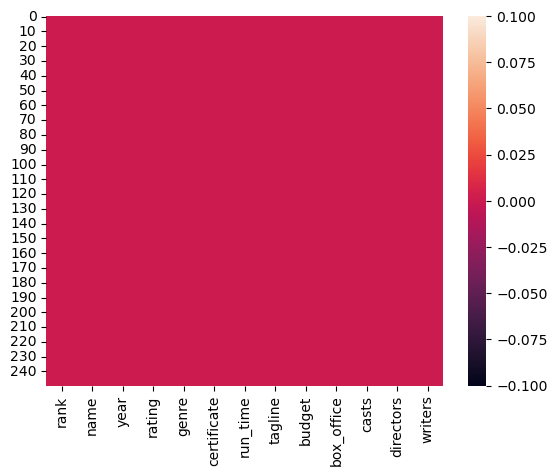

In [6]:
sns.heatmap(dataframe.isna())

<h1>Top 5 Movies on Rating</h1>

In [7]:
top_5 = dataframe.head()
top_5

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [8]:
x = top_5['name']
y = top_5['rating']

<AxesSubplot: xlabel='name', ylabel='rating'>

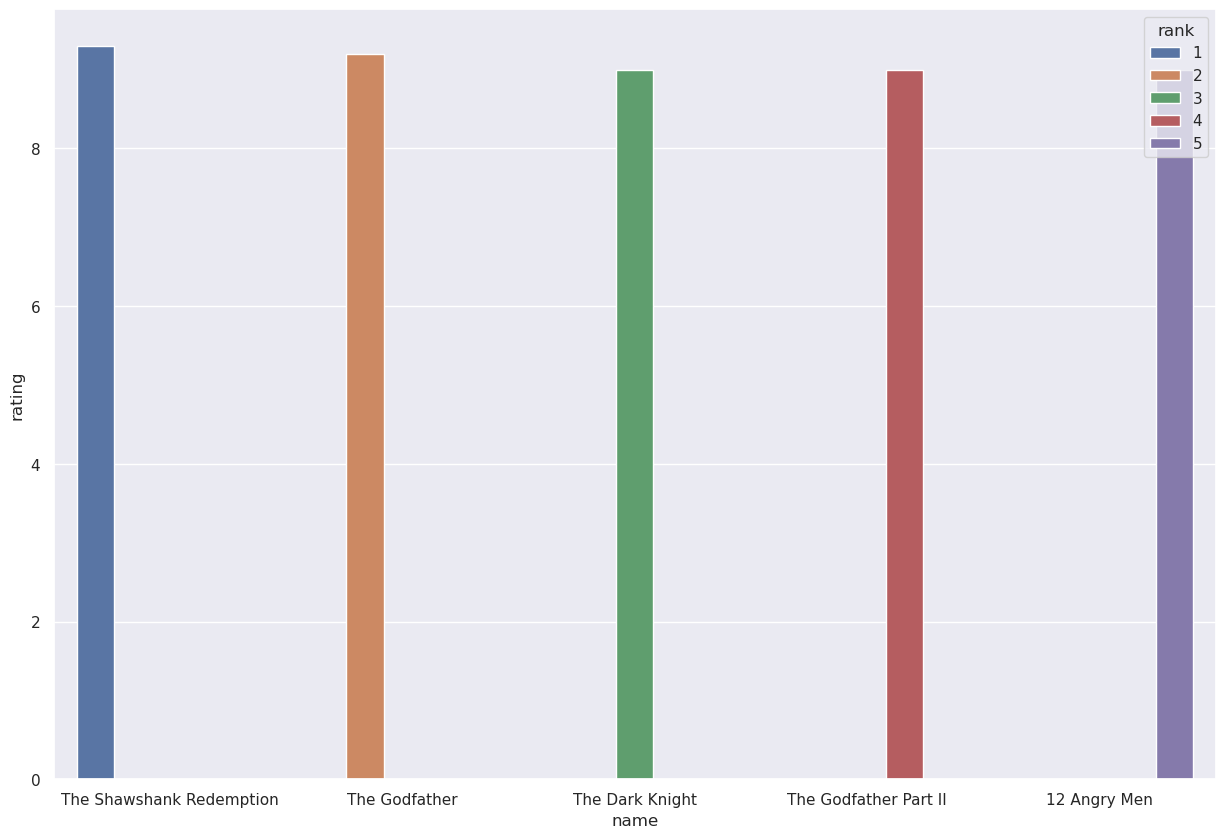

In [9]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x=x,y=y,data=top_5,hue='rank')

Avarage Rating of Movies on Genre catagory

In [10]:
genre_rating = pd.DataFrame(dataframe.groupby('genre').rating.mean())
genre_rating.sort_values(by='rating',ascending=False)

,rating
genre,
"Adventure,Western",8.8
"Action,Adventure,Drama",8.7
"Adventure,Drama,Sci-Fi",8.6
"Drama,Family,Fantasy",8.6
"Crime,Drama,Fantasy",8.6
...,...
"Adventure,Drama",8.1
"Adventure,Family,Fantasy",8.1
"Biography,Drama,Family",8.1


<AxesSubplot: xlabel='rating', ylabel='Count'>

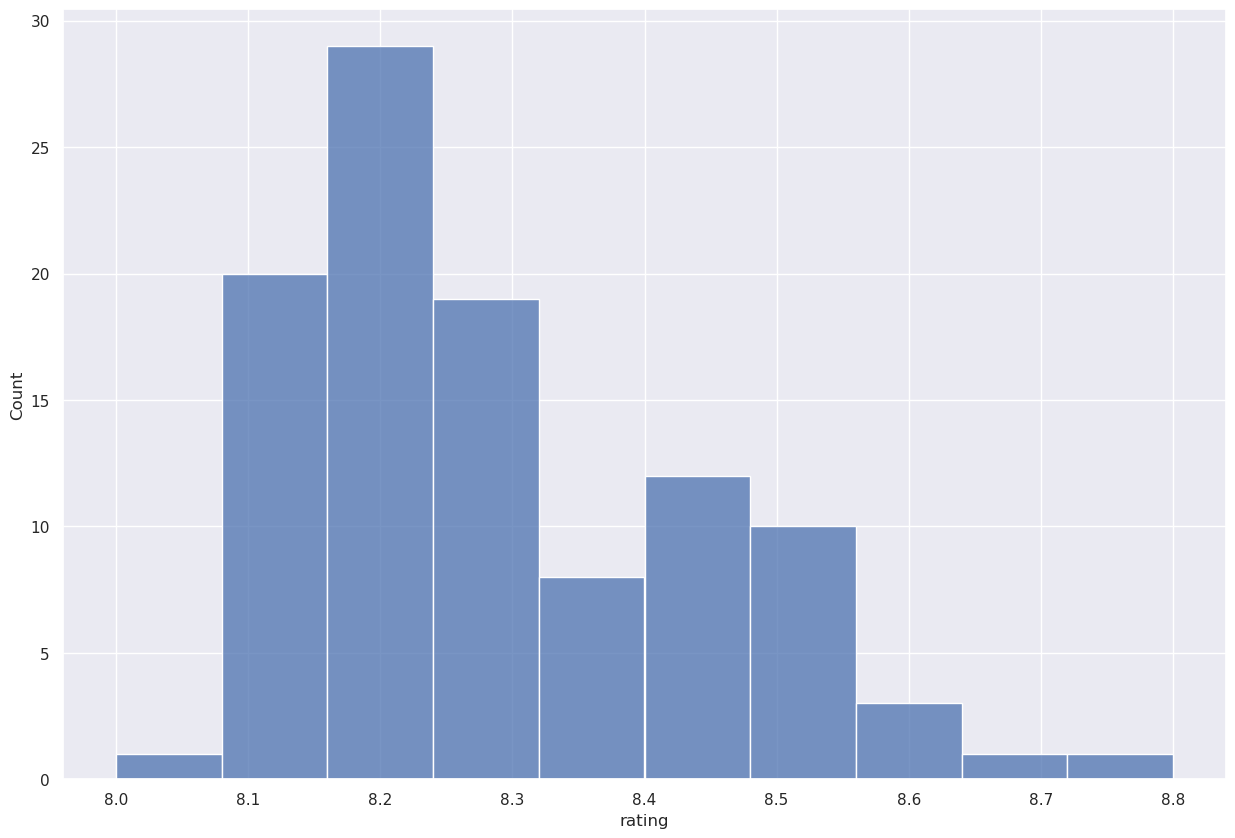

In [11]:
sns.histplot(dataframe.groupby('genre').rating.mean())

In [12]:
genres_df = dataframe['genre'].str.split(',', expand=True)
genres_df

,0,1,2
0,Drama,None,None
1,Crime,Drama,None
2,Action,Crime,Drama
3,Crime,Drama,None
4,Crime,Drama,None
...,...,...,...
245,Drama,None,None
246,Adventure,Biography,Drama
247,Animation,Adventure,Comedy
248,Biography,Drama,History


In [13]:
num_cols = len(genres_df.columns)
genres_df.columns = [f'genre_{i}' for i in range(1, num_cols+1)]
genres_df

,genre_1,genre_2,genre_3
0,Drama,None,None
1,Crime,Drama,None
2,Action,Crime,Drama
3,Crime,Drama,None
4,Crime,Drama,None
...,...,...,...
245,Drama,None,None
246,Adventure,Biography,Drama
247,Animation,Adventure,Comedy
248,Biography,Drama,History


In [14]:
data = pd.concat([dataframe, genres_df], axis=1)
data

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genre_1,genre_2,genre_3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett",Drama,None,None
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev",Adventure,Biography,Drama
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,Not Available,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott",Animation,Adventure,Comedy
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley,Biography,Drama,History


<h1>TOP 10 Movies Belong to Which Genre</h1?

In [64]:

dataframe_10 = pd.DataFrame(dataframe.genre.value_counts()).head(10)
x = dataframe_10.index

In [65]:
y = dataframe_10.genre

In [66]:
y

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Biography,Drama,History        9
Crime,Drama,Mystery            9
Drama,War                      8
Drama,Romance                  6
Crime,Drama,Thriller           5
Action,Crime,Drama             5
Action,Adventure,Drama         5
Name: genre, dtype: int64

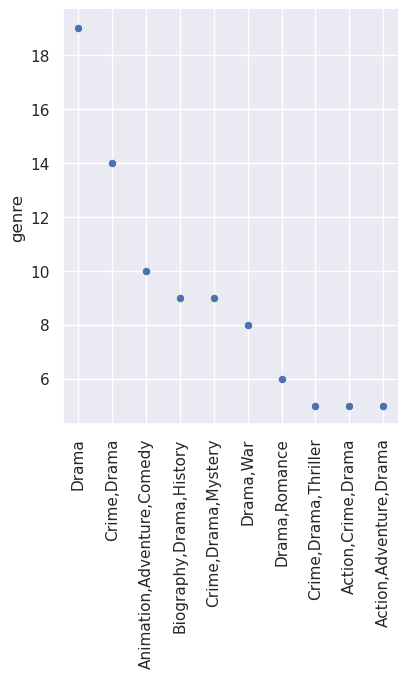

In [68]:
g = sns.relplot(x=x,y=y,data=dataframe_10)
plt.xticks(rotation=90)
plt.show()

In [70]:
dataframe.certificate.value_counts()

R                97
PG               37
PG-13            35
Not Rated        24
G                19
Passed           16
Approved         14
18+               1
Not Available     1
TV-PG             1
Unrated           1
X                 1
13+               1
TV-MA             1
GP                1
Name: certificate, dtype: int64

<h1>Movies disturbuted on basis of Certificates</h1>

In [71]:
certificate_df = pd.DataFrame(dataframe.certificate.value_counts())
x = certificate_df.index
y = certificate_df.certificate

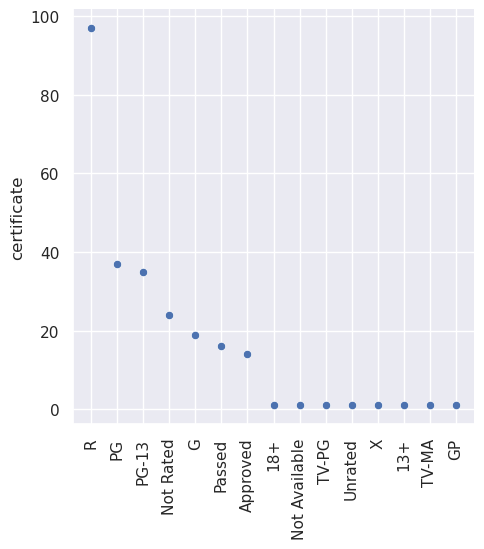

In [73]:
sns.relplot(x=x,y=y,data=certificate_df)
plt.xticks(rotation=90)
plt.show()